# Analysis of C++ Experiment Results

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('results.csv')

In [10]:
df.head()

,nbexp,compil-option,type,result
0,10000,NaN,float,0.7537
1,10000,NaN,long double,0.7827
2,10000,NaN,double,0.7491
3,10000,-O2 -ffloat-store -fno-fast-math,float,0.7402
4,10000,-O2 -ffloat-store -fno-fast-math,long double,0.7871


## Impact of Variability Factors

Let's analyze how each variability factor impacts the result.

### Nb Exp analysis

    nbexp  ecart_type
0    1000    0.012840
1   10000    0.006192
2  100000    0.001359


/tmp/ipykernel_20858/1526571457.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


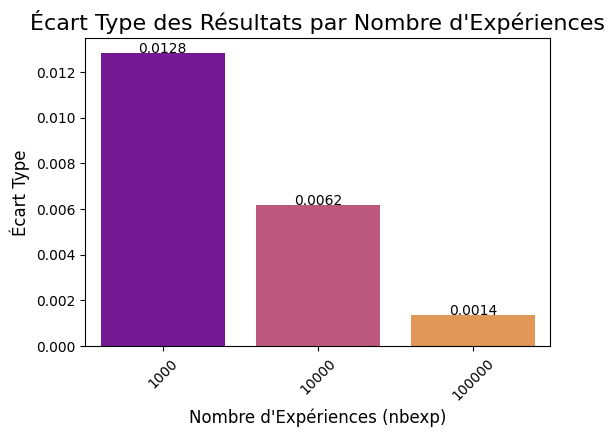

In [11]:
df = pd.read_csv('results.csv')

df_filtered = df[df['type'] != 'long double'].copy()

df_filtered['result'] = pd.to_numeric(df_filtered['result'], errors='coerce')

df_filtered.dropna(subset=['result'], inplace=True)

std_dev_by_exp = df_filtered.groupby('nbexp')['result'].std().reset_index()
std_dev_by_exp.rename(columns={'result': 'ecart_type'}, inplace=True)


plt.figure(figsize=(6, 4))
barplot = sns.barplot(
    x='nbexp',
    y='ecart_type',
    data=std_dev_by_exp,
    palette='plasma'
)

plt.title("Écart Type des Résultats par Nombre d'Expériences", fontsize=16)
plt.xlabel("Nombre d'Expériences (nbexp)", fontsize=12)
plt.ylabel("Écart Type", fontsize=12)
plt.xticks(rotation=45)
for index, row in std_dev_by_exp.iterrows():
    barplot.text(index, row.ecart_type, round(row.ecart_type, 4), color='black', ha="center")

print(std_dev_by_exp)

### Compiling option analysis

/tmp/ipykernel_20858/1617814966.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['compil-option'].fillna('aucune', inplace=True)
/tmp/ipykernel_20858/1617814966.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(
/tmp/ipykernel_20858/1617814966.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

                      compil-option  ecart_type
0  -O2 -ffloat-store -fno-fast-math    0.019619
1                            aucune    0.018630
                      compil-option   moyenne
0  -O2 -ffloat-store -fno-fast-math  0.743943
1                            aucune  0.748028


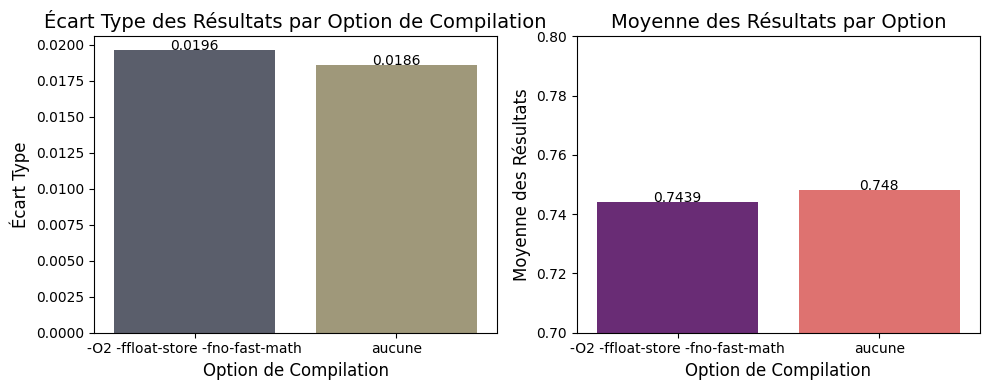

In [12]:
try:
    df = pd.read_csv('results.csv')

    df['compil-option'].fillna('aucune', inplace=True)

    df['result'] = pd.to_numeric(df['result'], errors='coerce')
    df.dropna(subset=['result'], inplace=True)


    std_dev_by_option = df.groupby('compil-option')['result'].std().reset_index()
    std_dev_by_option.rename(columns={'result': 'ecart_type'}, inplace=True)

    df_filtered = df[(df['nbexp'] != 1000) & (df['type'] != 'long double')].copy()
    mean_by_option = df_filtered.groupby('compil-option')['result'].mean().reset_index()
    mean_by_option.rename(columns={'result': 'moyenne'}, inplace=True)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    barplot1 = sns.barplot(
        ax=axes[0],
        x='compil-option',
        y='ecart_type',
        data=std_dev_by_option,
        palette='cividis'
    )
    axes[0].set_title("Écart Type des Résultats par Option de Compilation", fontsize=14)
    axes[0].set_xlabel("Option de Compilation", fontsize=12)
    axes[0].set_ylabel("Écart Type", fontsize=12)
    for index, row in std_dev_by_option.iterrows():
        barplot1.text(index, row.ecart_type, round(row.ecart_type, 4), color='black', ha="center")

    barplot2 = sns.barplot(
        ax=axes[1],
        x='compil-option',
        y='moyenne',
        data=mean_by_option,
        palette='magma'
    )
    axes[1].set_title("Moyenne des Résultats par Option", fontsize=14)
    axes[1].set_xlabel("Option de Compilation", fontsize=12)
    axes[1].set_ylabel("Moyenne des Résultats", fontsize=12)
    axes[1].set_ylim(0.7, 0.8)
    for index, row in mean_by_option.iterrows():
        barplot2.text(index, row.moyenne, round(row.moyenne, 4), color='black', ha="center")

    plt.tight_layout()

    print(std_dev_by_option)
    print(mean_by_option)

except FileNotFoundError:
    print("Erreur : Le fichier 'results.csv' est introuvable.")
except Exception as e:
    print(f"Une erreur inattendue est survenue : {e}")

### Type analysis

          type    result
0       double  0.748920
1        float  0.744663
2  long double  0.781754


/tmp/ipykernel_20858/2662148436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


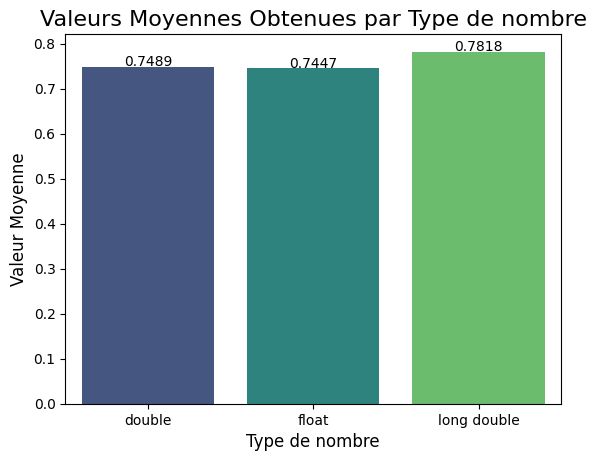

In [13]:
df = pd.read_csv('results.csv')
df['result'] = pd.to_numeric(df['result'], errors='coerce')
df.dropna(subset=['result'], inplace=True)
average_results = df.groupby('type')['result'].mean().reset_index()
barplot = sns.barplot(
    x='type',
    y='result',
    data=average_results,
    palette='viridis'
)

plt.title('Valeurs Moyennes Obtenues par Type de nombre', fontsize=16)
plt.xlabel('Type de nombre', fontsize=12)
plt.ylabel('Valeur Moyenne', fontsize=12)

for index, row in average_results.iterrows():
    barplot.text(index, row.result + 0.001, round(row.result, 4), color='black', ha="center")

print(average_results)

## Recommendations for a Stable Result

Based on the analysis above, we can provide the following recommendations for achieving a stable result:

* **Data Type:** `long double` appears to be the most stable, as it has the highest precision and is less prone to floating-point errors.
* **Compilation Options:** The `-O2 -ffloat-store -fno-fast-math` option is recommended as it enforces stricter adherence to floating-point standards.
* **Number of Repetitions:** A higher number of repetitions (e.g., 100,000) is preferable in order to accurately observe floating point inaccuracies. A lower number of repetitions means that the results of two experiments may differ. This difference has a significant impact because it does not allow for a precise understanding of the accuracy of the associative calculation.